In [1]:
import tratamento_dados as td
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = td.executa_df()

In [3]:
df.head()

,Agente Causador Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,...,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Despacho Benefício,Data Acidente.1,Idade
0,Veiculo Rodoviario M,732130,732130-Inst.-Reparad,S400,S40.0 Contusao do Om,4329,Obras de Instalacoes,Empregador,Pa,Empregado,...,"Contusao, Esmagament",Internet,Braco (Entre O Punho,Masculino,Típico,NaN,43,0,1,33
1,Chao - Superficie Ut,717020,717020-Servente de O,S728,S72.8 Frat de Outr P,4213,Obras de Urbanizacao,Empregador,Pa,Empregado,...,Fratura,Internet,Quadris (Inclusive P,Masculino,Típico,11.0,31,0,1,49
2,Tubo Sob Pressao (Ma,715405,715405-Oper. Betonei,M779,M77.9 Entesopatia Ne,4399,Servicos Especializa,Empregador,Pa,Empregado,...,Inflamacao de Articu,Internet,Antebraco (Entre O P,Masculino,Típico,NaN,42,0,2,36
3,"Andaime, Plataforma",710205,710205-Mestre (Const,,Em Branco,4322,Instalacoes Hidrauli,Empregador,Pa,Empregado,...,None,Internet,"Face, Partes Multipl",Masculino,Típico,21.0,35,0,5,56
4,Piso de Edificio - S,313120,313120-Tec. de Manut,S935,S93.5 Entorse e Dist,4321,Instalacoes Eletrica,Empregador,Pa,Empregado,...,"Distensao, Torcao",Internet,Pe (Exceto Artelhos),Masculino,Típico,21.0,35,0,2,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64152 entries, 0 to 64151
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Agente  Causador  Acidente   63752 non-null  object 
 1   CBO                          63675 non-null  object 
 2   CBO.1                        61855 non-null  object 
 3   CID-10                       63599 non-null  object 
 4   CID-10.1                     62599 non-null  object 
 5   CNAE2.0 Empregador           64152 non-null  int64  
 6   CNAE2.0 Empregador.1         64134 non-null  object 
 7   Emitente CAT                 64152 non-null  object 
 8   Espécie do benefício         64152 non-null  object 
 9   Filiação Segurado            64149 non-null  object 
 10  Indica acidente              64152 non-null  object 
 11  Munic Empr                   64147 non-null  object 
 12  Natureza da Lesão            63940 non-null  object 
 13  Origem de Cadast

In [5]:
colunas = df.columns
colunas

for coluna in colunas:
    print("Coluna: ",coluna,"   - Quantidade Unica: ", len(df[coluna].unique()))

Coluna:  Agente  Causador  Acidente    - Quantidade Unica:  457
Coluna:  CBO    - Quantidade Unica:  1300
Coluna:  CBO.1    - Quantidade Unica:  1176
Coluna:  CID-10    - Quantidade Unica:  3193
Coluna:  CID-10.1    - Quantidade Unica:  2992
Coluna:  CNAE2.0 Empregador    - Quantidade Unica:  20
Coluna:  CNAE2.0 Empregador.1    - Quantidade Unica:  31
Coluna:  Emitente CAT    - Quantidade Unica:  5
Coluna:  Espécie do benefício    - Quantidade Unica:  5
Coluna:  Filiação Segurado    - Quantidade Unica:  3
Coluna:  Indica acidente    - Quantidade Unica:  2
Coluna:  Munic Empr    - Quantidade Unica:  28
Coluna:  Natureza da Lesão    - Quantidade Unica:  50
Coluna:  Origem de Cadastramento CAT    - Quantidade Unica:  1
Coluna:  Parte Corpo Atingida    - Quantidade Unica:  74
Coluna:  Sexo    - Quantidade Unica:  3
Coluna:  Tipo do Acidente    - Quantidade Unica:  4
Coluna:  UF  Munic.  Acidente    - Quantidade Unica:  15
Coluna:  UF Munic. Empregador    - Quantidade Unica:  27
Coluna:  Da

In [6]:
import os

cbo = pd.read_csv('ArquivosTratados\\cbo.csv', encoding='latin-1', sep=',')
cbo = cbo.loc[:, ['CBO', 'Unnamed: 5']]
cbo.dropna(axis=0, how='any', inplace=True)
cbo_dict = dict([(i, a) for i, a in zip(cbo['CBO'], cbo['Unnamed: 5'])])


# CID
cid = pd.read_csv('ArquivosTratados\\cid.csv', encoding='latin-1', sep=',')
cid = cid.loc[:, ['CID-10', 'Unnamed: 5']]
cid.dropna(axis=0, how='any', inplace=True)
cid_dict = dict([(i, a) for i, a in zip(cid['CID-10'], cid['Unnamed: 5'])])


# Natureza
natureza = pd.read_csv('ArquivosTratados\\natureza.csv', encoding='latin-1', sep=',')
natureza = natureza.loc[:, ['Natureza', 'Agente']]
natureza.dropna(axis=0, how='any', inplace=True)
natureza_dict = dict([(i, a) for i, a in zip(natureza['Natureza'], natureza['Agente'])])

# Transformando o DF
df = df.loc[:, ['Agente  Causador  Acidente', 'CBO', 'CID-10', 'CNAE2.0 Empregador', 
                'CNAE2.0 Empregador.1', 'Emitente CAT', 'Espécie do benefício', 
                'Filiação Segurado', 'Indica acidente', 'Munic Empr', 'Natureza da Lesão', 
                'Origem de Cadastramento CAT', 'Parte Corpo Atingida', 'Sexo', 'Tipo do Acidente',
                'UF  Munic.  Acidente', 'UF Munic. Empregador','Data Despacho Benefício', 'Data Acidente.1', 'Idade']]


## Provisório Começo

In [7]:
df['CBO'] = df['CBO'].map(cbo_dict)
df['CID-10'] = df['CID-10'].map(cid_dict)
df['Agente  Causador  Acidente Dict'] = df['Agente  Causador  Acidente'].map(natureza_dict)
print("Novos Valores únicos")
print("Valores únicos CBO: ",len(df['CBO'].unique()))
print("Valores únicos CID: ",len(df['CID-10'].unique()))
print("Valores únicos Agente: ",len(df['Agente  Causador  Acidente Dict'].unique()))

Novos Valores únicos
Valores únicos CBO:  146
Valores únicos CID:  23
Valores únicos Agente:  6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64152 entries, 0 to 64151
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Agente  Causador  Acidente       63752 non-null  object 
 1   CBO                              52675 non-null  object 
 2   CID-10                           63308 non-null  object 
 3   CNAE2.0 Empregador               64152 non-null  int64  
 4   CNAE2.0 Empregador.1             64134 non-null  object 
 5   Emitente CAT                     64152 non-null  object 
 6   Espécie do benefício             64152 non-null  object 
 7   Filiação Segurado                64149 non-null  object 
 8   Indica acidente                  64152 non-null  object 
 9   Munic Empr                       64147 non-null  object 
 10  Natureza da Lesão                63940 non-null  object 
 11  Origem de Cadastramento CAT      64152 non-null  object 
 12  Parte Corpo Atingi

In [9]:
# Muitos Nan em UF  Munic.  Acidente. 
df.drop('UF  Munic.  Acidente', axis=1, inplace=True)
# Valores inconsistentes
df.drop('Data Despacho Benefício', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64152 entries, 0 to 64151
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Agente  Causador  Acidente       63752 non-null  object
 1   CBO                              52675 non-null  object
 2   CID-10                           63308 non-null  object
 3   CNAE2.0 Empregador               64152 non-null  int64 
 4   CNAE2.0 Empregador.1             64134 non-null  object
 5   Emitente CAT                     64152 non-null  object
 6   Espécie do benefício             64152 non-null  object
 7   Filiação Segurado                64149 non-null  object
 8   Indica acidente                  64152 non-null  object
 9   Munic Empr                       64147 non-null  object
 10  Natureza da Lesão                63940 non-null  object
 11  Origem de Cadastramento CAT      64152 non-null  object
 12  Parte Corpo Atingida            

In [10]:
# Excluindo qualquer linah que contenha valor nulo
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50380 entries, 0 to 52770
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Agente  Causador  Acidente       50380 non-null  object
 1   CBO                              50380 non-null  object
 2   CID-10                           50380 non-null  object
 3   CNAE2.0 Empregador               50380 non-null  int64 
 4   CNAE2.0 Empregador.1             50380 non-null  object
 5   Emitente CAT                     50380 non-null  object
 6   Espécie do benefício             50380 non-null  object
 7   Filiação Segurado                50380 non-null  object
 8   Indica acidente                  50380 non-null  object
 9   Munic Empr                       50380 non-null  object
 10  Natureza da Lesão                50380 non-null  object
 11  Origem de Cadastramento CAT      50380 non-null  object
 12  Parte Corpo Atingida            

In [11]:
df_tipicos2 = df.loc[df['Tipo do Acidente'] == 'Típico',:]
df_tipicos2['Tipo do Acidente'].unique()

occur_agente_tipicos2 = df_tipicos2.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_tipicos2.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_tipicos2['%Total'] = round((occur_agente_tipicos2['Total_Acidentes']/sum(occur_agente_tipicos2['Total_Acidentes']))*100, 2)
occur_agente_tipicos2.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_tipicos2.head()

occur_agente_tipicos2.to_csv('top10-tipicos\\agente2.csv')

In [12]:
occur_agente_tipicos2['Total_Acidentes'].sum()

42838

In [17]:
df_trajeto2 = df.loc[df['Tipo do Acidente'] == 'Trajeto',:]

occur_agente_trajetos2 = df_trajeto2.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_trajetos2.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_trajetos2['%Total'] = round((occur_agente_trajetos2['Total_Acidentes']/sum(occur_agente_trajetos2['Total_Acidentes']))*100, 2)
occur_agente_trajetos2.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_trajetos2.head()

occur_agente_trajetos2.to_csv('top10-trajetos\\agente2.csv')

print(occur_agente_trajetos2['Total_Acidentes'].sum())

7127


In [18]:
df_doenca2 = df.loc[df['Tipo do Acidente'] == 'Doença',:]

occur_agente_doencas2 = df_doenca2.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_doencas2.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_doencas2['%Total'] = round((occur_agente_doencas2['Total_Acidentes']/sum(occur_agente_doencas2['Total_Acidentes']))*100, 2)
occur_agente_doencas2.sort_values(by='Total_Acidentes', ascending=False, inplace=True)

occur_agente_doencas2.to_csv('top10-doencas\\agente2.csv')

print(occur_agente_doencas2['Total_Acidentes'].sum())

415


In [19]:
df_mortes = df.loc[df['Indica acidente'] == 'Sim',:]

occur_agente = df.groupby(['Agente  Causador  Acidente']).size()
occur_fatais_agente = df_mortes.groupby(['Agente  Causador  Acidente']).size()

In [20]:
# Agentes
occur_agente = occur_agente.reset_index()
occur_fatais_agente = occur_fatais_agente.reset_index()
occur_agente = occur_agente.merge(occur_fatais_agente, how='left', on='Agente  Causador  Acidente')
occur_agente.columns = ['Agentes', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_agente['Fatais/Totais-%'] = (occur_agente['Acidentes-Fatais'] / occur_agente['Acidentes-Totais']) * 100
occur_agente.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_agente.head(5)

,Agentes,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
131,Metal - Inclui Liga,5100,3.0,0.058824
135,"Motocicleta, Motonet",3096,25.0,0.807494
38,Chao - Superficie Ut,2052,5.0,0.243665
224,Veiculo Rodoviario M,2039,63.0,3.089750
228,"Veiculo, Nic",1986,39.0,1.963746


In [21]:
occur_agente.to_csv('fatalidades\\agente2.csv')

## Provisório Fim

In [9]:
print("Valores únicos CBO: ",len(df['CBO'].unique()))
print("Valores únicos CID: ",len(df['CID-10'].unique()))
print("Valores únicos Agente: ",len(df['Agente  Causador  Acidente'].unique()))

Valores únicos CBO:  1300
Valores únicos CID:  3193
Valores únicos Agente:  457


In [10]:
df['CBO'] = df['CBO'].map(cbo_dict)
df['CID-10'] = df['CID-10'].map(cid_dict)
df['Agente  Causador  Acidente'] = df['Agente  Causador  Acidente'].map(natureza_dict)

In [11]:
print("Novos Valores únicos")
print("Valores únicos CBO: ",len(df['CBO'].unique()))
print("Valores únicos CID: ",len(df['CID-10'].unique()))
print("Valores únicos Agente: ",len(df['Agente  Causador  Acidente'].unique()))

Novos Valores únicos
Valores únicos CBO:  146
Valores únicos CID:  23
Valores únicos Agente:  6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64152 entries, 0 to 64151
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Agente  Causador  Acidente   61604 non-null  object 
 1   CBO                          52675 non-null  object 
 2   CID-10                       63308 non-null  object 
 3   CNAE2.0 Empregador           64152 non-null  int64  
 4   CNAE2.0 Empregador.1         64134 non-null  object 
 5   Emitente CAT                 64152 non-null  object 
 6   Espécie do benefício         64152 non-null  object 
 7   Filiação Segurado            64149 non-null  object 
 8   Indica acidente              64152 non-null  object 
 9   Munic Empr                   64147 non-null  object 
 10  Natureza da Lesão            63940 non-null  object 
 11  Origem de Cadastramento CAT  64152 non-null  object 
 12  Parte Corpo Atingida         64062 non-null  object 
 13  Sexo            

In [13]:
# Muitos Nan em UF  Munic.  Acidente. 
df.drop('UF  Munic.  Acidente', axis=1, inplace=True)
# Valores inconsistentes
df.drop('Data Despacho Benefício', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64152 entries, 0 to 64151
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Agente  Causador  Acidente   61604 non-null  object
 1   CBO                          52675 non-null  object
 2   CID-10                       63308 non-null  object
 3   CNAE2.0 Empregador           64152 non-null  int64 
 4   CNAE2.0 Empregador.1         64134 non-null  object
 5   Emitente CAT                 64152 non-null  object
 6   Espécie do benefício         64152 non-null  object
 7   Filiação Segurado            64149 non-null  object
 8   Indica acidente              64152 non-null  object
 9   Munic Empr                   64147 non-null  object
 10  Natureza da Lesão            63940 non-null  object
 11  Origem de Cadastramento CAT  64152 non-null  object
 12  Parte Corpo Atingida         64062 non-null  object
 13  Sexo                         64

In [14]:
# Excluindo qualquer linah que contenha valor nulo
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50380 entries, 0 to 52770
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Agente  Causador  Acidente   50380 non-null  object
 1   CBO                          50380 non-null  object
 2   CID-10                       50380 non-null  object
 3   CNAE2.0 Empregador           50380 non-null  int64 
 4   CNAE2.0 Empregador.1         50380 non-null  object
 5   Emitente CAT                 50380 non-null  object
 6   Espécie do benefício         50380 non-null  object
 7   Filiação Segurado            50380 non-null  object
 8   Indica acidente              50380 non-null  object
 9   Munic Empr                   50380 non-null  object
 10  Natureza da Lesão            50380 non-null  object
 11  Origem de Cadastramento CAT  50380 non-null  object
 12  Parte Corpo Atingida         50380 non-null  object
 13  Sexo                         50

In [15]:
colunas = df.columns
colunas

for coluna in colunas:
    print("Coluna: ",coluna,"   - Quantidade Unica: ", len(df[coluna].unique()))

Coluna:  Agente  Causador  Acidente    - Quantidade Unica:  5
Coluna:  CBO    - Quantidade Unica:  145
Coluna:  CID-10    - Quantidade Unica:  22
Coluna:  CNAE2.0 Empregador    - Quantidade Unica:  16
Coluna:  CNAE2.0 Empregador.1    - Quantidade Unica:  16
Coluna:  Emitente CAT    - Quantidade Unica:  5
Coluna:  Espécie do benefício    - Quantidade Unica:  3
Coluna:  Filiação Segurado    - Quantidade Unica:  2
Coluna:  Indica acidente    - Quantidade Unica:  2
Coluna:  Munic Empr    - Quantidade Unica:  27
Coluna:  Natureza da Lesão    - Quantidade Unica:  28
Coluna:  Origem de Cadastramento CAT    - Quantidade Unica:  1
Coluna:  Parte Corpo Atingida    - Quantidade Unica:  42
Coluna:  Sexo    - Quantidade Unica:  2
Coluna:  Tipo do Acidente    - Quantidade Unica:  3
Coluna:  UF Munic. Empregador    - Quantidade Unica:  27
Coluna:  Data Acidente.1    - Quantidade Unica:  7
Coluna:  Idade    - Quantidade Unica:  48


In [16]:
df.head()

,Agente Causador Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Empregador,Data Acidente.1,Idade
0,M,Instaladores e reparadores de linhas e cabos e...,"Lesões, envenenamentos e algumas outras conseq...",4329,Obras de Instalacoes,Empregador,Pa,Empregado,Não,43,"Contusao, Esmagament",Internet,Braco (Entre O Punho,Masculino,Típico,43,1,33
1,M,Ajudantes de obras,"Lesões, envenenamentos e algumas outras conseq...",4213,Obras de Urbanizacao,Empregador,Pa,Empregado,Não,31,Fratura,Internet,Quadris (Inclusive P,Masculino,Típico,31,1,49
2,M,Trabalhadores da construção civil e obras públ...,Doenças do sistema osteomuscular e do tecido c...,4399,Servicos Especializa,Empregador,Pa,Empregado,Não,42,Inflamacao de Articu,Internet,Antebraco (Entre O P,Masculino,Típico,42,2,36
4,M,Técnicos em eletroeletrônica e fotônica,"Lesões, envenenamentos e algumas outras conseq...",4321,Instalacoes Eletrica,Empregador,Pa,Empregado,Não,35,"Distensao, Torcao",Internet,Pe (Exceto Artelhos),Masculino,Típico,35,2,44
5,M,Eletricistas eletrônicos de manutenção industr...,"Lesões, envenenamentos e algumas outras conseq...",4329,Obras de Instalacoes,Empregador,Pa,Empregado,Não,35,Amputacao ou Enuclea,Internet,Dedo,Masculino,Típico,35,6,39


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Verificado dados por tipo de Acidente
## Tipo = Típico

In [18]:
df['Tipo do Acidente'].unique()

array(['Típico', 'Trajeto', 'Doença'], dtype=object)

In [19]:
df_tipicos = df.loc[df['Tipo do Acidente'] == 'Típico',:]
df_tipicos['Tipo do Acidente'].unique()

array(['Típico'], dtype=object)

In [20]:
occur_cbo_tipicos = df_tipicos.groupby(['CBO']).size().reset_index()
occur_cbo_tipicos.columns = ['CBO', 'Total_Acidentes']
occur_cbo_tipicos['%Total'] = round((occur_cbo_tipicos['Total_Acidentes']/sum(occur_cbo_tipicos['Total_Acidentes']))*100, 2)
occur_cbo_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cbo_tipicos.head(10)

,CBO,Total_Acidentes,%Total
83,Trabalhadores da construção civil e obras públ...,12806,29.89
1,Ajudantes de obras,11275,26.32
101,"Trabalhadores de montagem de tubulações, estru...",2689,6.28
112,"Trabalhadores nos serviços de administração, c...",2657,6.20
7,Condutores de veículos e operadores de equipam...,1863,4.35
94,Trabalhadores de acabamento de obras,1016,2.37
59,Supervisores da extração mineral e da construç...,778,1.82
108,Trabalhadores elementares da manutenção,756,1.76
28,Mecânicos de manutenção de máquinas e equipame...,727,1.70
11,Eletricistas eletrônicos de manutenção industr...,710,1.66


In [21]:
occur_cnae_tipicos = df_tipicos.groupby(['CNAE2.0 Empregador.1']).size().reset_index()
occur_cnae_tipicos.columns = ['CNAE', 'Total_Acidentes']
occur_cnae_tipicos['%Total'] = round((occur_cnae_tipicos['Total_Acidentes']/sum(occur_cnae_tipicos['Total_Acidentes']))*100, 2)
occur_cnae_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cnae_tipicos.head(10)

,CNAE,Total_Acidentes,%Total
0,Construcao de Edific,16484,38.48
3,Construcao de Rodovi,4348,10.15
5,Instalacoes Eletrica,4255,9.93
14,Servicos Especializa,4102,9.58
8,Obras de Engenharia,2543,5.94
7,Obras de Acabamento,2233,5.21
6,Instalacoes Hidrauli,1701,3.97
10,Obras de Instalacoes,1324,3.09
11,Obras de Terraplenag,1228,2.87
12,Obras de Urbanizacao,1202,2.81


In [22]:
occur_agente_tipicos = df_tipicos.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_tipicos.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_tipicos['%Total'] = round((occur_agente_tipicos['Total_Acidentes']/sum(occur_agente_tipicos['Total_Acidentes']))*100, 2)
occur_agente_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_tipicos

,Agente_Causador,Total_Acidentes,%Total
3,M,34717,81.04
4,Q,6769,15.80
0,B,874,2.04
1,E,435,1.02
2,F,43,0.10


In [23]:
occur_cid_tipicos = df_tipicos.groupby(['CID-10']).size().reset_index()
occur_cid_tipicos.columns = ['CID', 'Total_Acidentes']
occur_cid_tipicos['%Total'] = round((occur_cid_tipicos['Total_Acidentes']/sum(occur_cid_tipicos['Total_Acidentes']))*100, 2)
occur_cid_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cid_tipicos.head(10)

,CID,Total_Acidentes,%Total
16,"Lesões, envenenamentos e algumas outras conseq...",36166,84.43
12,Doenças do sistema osteomuscular e do tecido c...,2423,5.66
1,Causas externas de morbidade e de mortalidade\t,1742,4.07
14,Fatores que exercem influência sobre o estado ...,973,2.27
18,"Sintomas, sinais e achados anormais de exames ...",457,1.07
8,Doenças do olho e anexos\t,351,0.82
3,Doenças da pele e do tecido subcutâneo\t,162,0.38
21,neoplasias (tumores),120,0.28
17,"Malformações congênitas, deformidades e anomal...",90,0.21
5,Doenças do aparelho digestivo\t,80,0.19


In [24]:
occur_natureza_tipicos = df_tipicos.groupby(['Natureza da Lesão']).size().reset_index()
occur_natureza_tipicos.columns = ['Natureza', 'Total_Acidentes']
occur_natureza_tipicos['%Total'] = round((occur_natureza_tipicos['Total_Acidentes']/sum(occur_natureza_tipicos['Total_Acidentes']))*100, 2)
occur_natureza_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_natureza_tipicos.head(10)

,Natureza,Total_Acidentes,%Total
6,"Corte, Laceracao, Fe",9887,23.08
15,Fratura,9696,22.63
5,"Contusao, Esmagament",5301,12.37
20,"Lesao Imediata, Nic",3847,8.98
8,"Distensao, Torcao",3350,7.82
13,"Escoriacao, Abrasao",3163,7.38
22,Luxacao,2880,6.72
21,Lesoes Multiplas,958,2.24
0,Amputacao ou Enuclea,630,1.47
27,Queimadura ou Escald,611,1.43


In [25]:
occur_parte_corpo_tipicos = df_tipicos.groupby(['Parte Corpo Atingida']).size().reset_index()
occur_parte_corpo_tipicos.columns = ['Parte Corpo', 'Total_Acidentes']
occur_parte_corpo_tipicos['%Total'] = round((occur_parte_corpo_tipicos['Total_Acidentes']/sum(occur_parte_corpo_tipicos['Total_Acidentes']))*100, 2)
occur_parte_corpo_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_parte_corpo_tipicos.head(10)

,Parte Corpo,Total_Acidentes,%Total
16,Dedo,10756,25.11
30,Pe (Exceto Artelhos),4817,11.24
22,Mao (Exceto Punho ou,3173,7.41
19,Joelho,1790,4.18
31,"Perna (Do Tornozelo,",1770,4.13
7,Articulacao do Torno,1462,3.41
32,Perna (Entre O Torno,1451,3.39
1,Antebraco (Entre O P,1325,3.09
11,"Cabeca, Nic",1321,3.08
17,Dorso (Inclusive Mus,1288,3.01


In [26]:
occur_sexo_tipicos = df_tipicos.groupby(['Sexo']).size().reset_index()
occur_sexo_tipicos.columns = ['Sexo', 'Total_Acidentes']
occur_sexo_tipicos['%Total'] = round((occur_sexo_tipicos['Total_Acidentes']/sum(occur_sexo_tipicos['Total_Acidentes']))*100, 2)
occur_sexo_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_sexo_tipicos

,Sexo,Total_Acidentes,%Total
1,Masculino,41744,97.45
0,Feminino,1094,2.55


In [27]:
occur_idade_tipicos = df_tipicos.groupby(['Idade']).size().reset_index()
occur_idade_tipicos.columns = ['Idade', 'Total_Acidentes']
occur_idade_tipicos['%Total'] = round((occur_idade_tipicos['Total_Acidentes']/sum(occur_idade_tipicos['Total_Acidentes']))*100, 2)
occur_idade_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_idade_tipicos.head()

,Idade,Total_Acidentes,%Total
12,30,1495,3.49
14,32,1492,3.48
13,31,1484,3.46
15,33,1436,3.35
19,37,1405,3.28


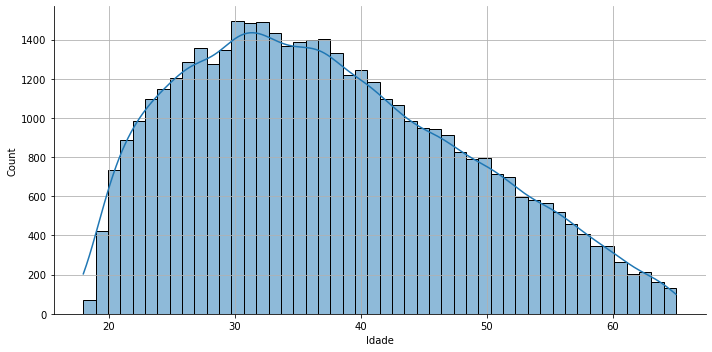

In [28]:
sns.displot(df_tipicos['Idade'], kde=True, bins=len(df_tipicos['Idade'].unique()), height=5, aspect=2)
plt.grid()
plt.savefig('Apresentação\\V1\\idade-tipico')
plt.show()

In [29]:
occur_data_tipicos = df_tipicos.groupby(['Data Acidente.1']).size().reset_index()
occur_data_tipicos.columns = ['Idade', 'Total_Acidentes']
occur_data_tipicos['%Total'] = round((occur_data_tipicos['Total_Acidentes']/sum(occur_data_tipicos['Total_Acidentes']))*100, 2)
occur_data_tipicos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_data_tipicos.head()

,Idade,Total_Acidentes,%Total
0,0,8462,19.75
1,1,8356,19.51
2,2,8314,19.41
3,3,8005,18.69
4,4,6504,15.18


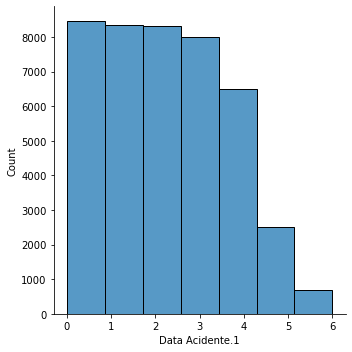

In [30]:
sns.displot(df_tipicos['Data Acidente.1'], bins=len(df_tipicos['Data Acidente.1'].unique()))
plt.show()

In [31]:
np.sort(df_tipicos['Idade'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
      dtype=int64)

In [3]:
import tratamento_dados_semMudarDataAcidente as tds
df2 = td.executa_df()

In [4]:
df2.head()

,Agente Causador Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,...,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Despacho Benefício,Data Acidente.1,Idade
0,Veiculo Rodoviario M,732130,732130-Inst.-Reparad,S400,S40.0 Contusao do Om,4329,Obras de Instalacoes,Empregador,Pa,Empregado,...,"Contusao, Esmagament",Internet,Braco (Entre O Punho,Masculino,Típico,NaN,43,0,1,33
1,Chao - Superficie Ut,717020,717020-Servente de O,S728,S72.8 Frat de Outr P,4213,Obras de Urbanizacao,Empregador,Pa,Empregado,...,Fratura,Internet,Quadris (Inclusive P,Masculino,Típico,11.0,31,0,1,49
2,Tubo Sob Pressao (Ma,715405,715405-Oper. Betonei,M779,M77.9 Entesopatia Ne,4399,Servicos Especializa,Empregador,Pa,Empregado,...,Inflamacao de Articu,Internet,Antebraco (Entre O P,Masculino,Típico,NaN,42,0,2,36
3,"Andaime, Plataforma",710205,710205-Mestre (Const,,Em Branco,4322,Instalacoes Hidrauli,Empregador,Pa,Empregado,...,None,Internet,"Face, Partes Multipl",Masculino,Típico,21.0,35,0,5,56
4,Piso de Edificio - S,313120,313120-Tec. de Manut,S935,S93.5 Entorse e Dist,4321,Instalacoes Eletrica,Empregador,Pa,Empregado,...,"Distensao, Torcao",Internet,Pe (Exceto Artelhos),Masculino,Típico,21.0,35,0,2,44


In [5]:
acidentes_mes = pd.DataFrame()

In [6]:
for i in range(2018,2022):
    for j in range(1,13):
        if((i == 2018 and j<=6) or(i == 2021 and j>6)):
            continue
        else:
            coluna = str(j)+'/'+str(i)
            if(j == 12):
                prov = df2.loc[df2['Data Acidente.1'] < pd.Timestamp(i+1, 1, 1), :]
                prov = prov.loc[df2['Data Acidente.1'] >= pd.Timestamp(i, j, 1), :]
            else:
                prov = df2.loc[df2['Data Acidente.1'] < pd.Timestamp(i, j+1, 1), :]
                prov = prov.loc[df2['Data Acidente.1'] >= pd.Timestamp(i, j, 1), :]
            acidentes_mes.loc[1, coluna] = len(prov.loc[prov['Tipo do Acidente'] == 'Típico',:])
            acidentes_mes.loc[2, coluna] = len(prov.loc[prov['Tipo do Acidente'] == 'Trajeto',:])
            acidentes_mes.loc[3, coluna] = len(prov.loc[prov['Tipo do Acidente'] == 'Doença',:])
acidentes_mes.index = ['Típica', 'Trajeto', 'Doença']

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'Timestamp'

In [7]:
acidentes_mes = (acidentes_mes.T).reset_index()
acidentes_mes.head()

,index


In [38]:
acidentes_mes['index'] = pd.to_datetime(acidentes_mes['index'], format='%m/%Y') 

In [39]:
acidentes_mes['Típica MM3'] = pd.DataFrame(acidentes_mes['Típica'].values).rolling(window=3).mean().values
acidentes_mes['Trajeto MM3'] = pd.DataFrame(acidentes_mes['Trajeto'].values).rolling(window=3).mean().values
acidentes_mes['Doença MM3'] = pd.DataFrame(acidentes_mes['Doença'].values).rolling(window=3).mean().values

In [40]:
acidentes_mes.head()

,index,Típica,Trajeto,Doença,Típica MM3,Trajeto MM3,Doença MM3
0,2018-07-01,1549.0,312.0,23.0,NaN,NaN,NaN
1,2018-08-01,1660.0,318.0,13.0,NaN,NaN,NaN
2,2018-09-01,1434.0,294.0,11.0,1547.666667,308.000000,15.666667
3,2018-10-01,1741.0,300.0,40.0,1611.666667,304.000000,21.333333
4,2018-11-01,1477.0,263.0,16.0,1550.666667,285.666667,22.333333


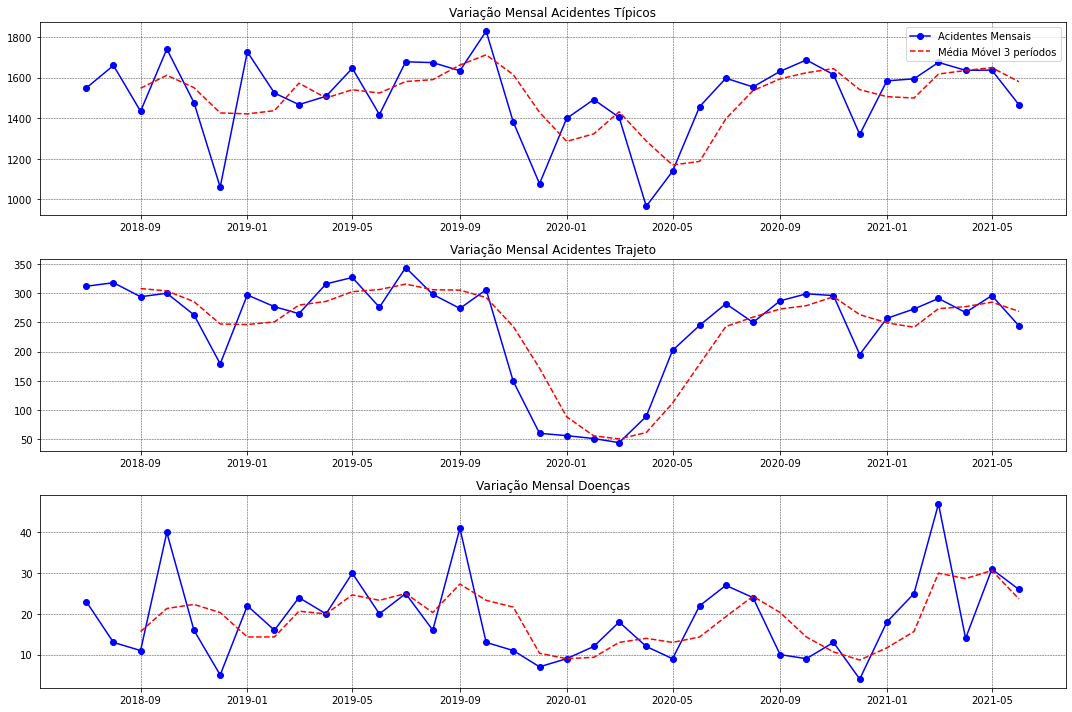

In [41]:
fig, ax = plt.subplots(3, 1, figsize=(15,10))

ax[0].plot(acidentes_mes['index'].values, acidentes_mes['Típica'].values, marker ='o', color='blue', label='Acidentes Mensais')
ax[0].plot(acidentes_mes['index'].values, acidentes_mes['Típica MM3'].values, color = 'red', ls='--', label='Média Móvel 3 períodos')
ax[0].set_title('Variação Mensal Acidentes Típicos')
ax[0].legend(loc = 0)
ax[0].grid(linestyle="--", linewidth=0.5, color='.25')
ax[1].plot(acidentes_mes['index'].values, acidentes_mes['Trajeto'].values, marker ='o', color='blue', label='Acidentes Mensais')
ax[1].plot(acidentes_mes['index'].values, acidentes_mes['Trajeto MM3'].values, color = 'red', ls='--', label='Média Móvel 3 períodos')
ax[1].set_title('Variação Mensal Acidentes Trajeto')
ax[1].grid(linestyle="--", linewidth=0.5, color='.25')
#ax[1].legend(loc = 0)
ax[2].plot(acidentes_mes['index'].values, acidentes_mes['Doença'].values, marker ='o', color='blue', label='Acidentes Mensais')
ax[2].plot(acidentes_mes['index'].values, acidentes_mes['Doença MM3'].values, color = 'red', ls='--', label='Média Móvel 3 períodos')
ax[2].set_title('Variação Mensal Doenças')
ax[2].grid(linestyle="--", linewidth=0.5, color='.25')
#ax[2].legend(loc = 0)
plt.savefig('Apresentação\\V1\\variacao-tipo-tempo')
plt.tight_layout()

In [8]:
df_tipicos2 = df2.loc[df2['Tipo do Acidente'] == 'Típico',:]
df_tipicos2['Tipo do Acidente'].unique()

array(['Típico'], dtype=object)

In [9]:
occur_agente_tipicos2 = df_tipicos2.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_tipicos2.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_tipicos2['%Total'] = round((occur_agente_tipicos2['Total_Acidentes']/sum(occur_agente_tipicos2['Total_Acidentes']))*100, 2)
occur_agente_tipicos2.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_tipicos2.head()

,Agente_Causador,Total_Acidentes,%Total
259,Metal - Inclui Liga,5098,9.39
82,Chao - Superficie Ut,1844,3.40
145,Escada Movel ou Fixa,1763,3.25
231,"Madeira (Toro, Madei",1610,2.96
19,"Andaime, Plataforma",1598,2.94


In [44]:
df.columns

Index(['Agente  Causador  Acidente', 'CBO', 'CID-10', 'CNAE2.0 Empregador',
       'CNAE2.0 Empregador.1', 'Emitente CAT', 'Espécie do benefício',
       'Filiação Segurado', 'Indica acidente', 'Munic Empr',
       'Natureza da Lesão', 'Origem de Cadastramento CAT',
       'Parte Corpo Atingida', 'Sexo', 'Tipo do Acidente',
       'UF Munic. Empregador', 'Data Acidente.1', 'Idade'],
      dtype='object')

In [44]:
occur_cbo_tipicos.to_csv('top10-tipicos\\cbo.csv')
occur_cnae_tipicos.to_csv('top10-tipicos\\cnae.csv')
occur_agente_tipicos.to_csv('top10-tipicos\\agente.csv')
occur_cid_tipicos.to_csv('top10-tipicos\\cid.csv')
occur_natureza_tipicos.to_csv('top10-tipicos\\natureza.csv')

occur_parte_corpo_tipicos.to_csv('top10-tipicos\\parte-corpo.csv')
occur_sexo_tipicos.to_csv('top10-tipicos\\sexo.csv')
occur_idade_tipicos.to_csv('top10-tipicos\\idade.csv')
occur_data_tipicos.to_csv('top10-tipicos\\data.csv')



In [10]:
occur_agente_tipicos2.to_csv('top10-tipicos\\agente2.csv')

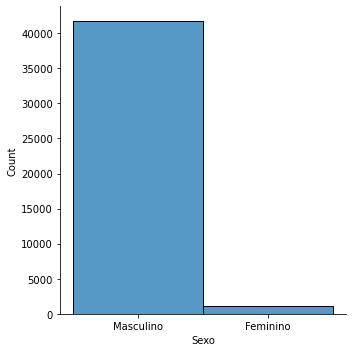

In [45]:
fig = sns.displot(data = df_tipicos, x='Sexo')
plt.show(fig)

## Tipo = Trajeto

In [46]:
df_trajeto = df.loc[df['Tipo do Acidente'] == 'Trajeto',:]
df_trajeto['Tipo do Acidente'].unique()

array(['Trajeto'], dtype=object)

In [47]:
occur_cbo_trajetos = df_trajeto.groupby(['CBO']).size().reset_index()
occur_cbo_trajetos.columns = ['CBO', 'Total_Acidentes']
occur_cbo_trajetos['%Total'] = round((occur_cbo_trajetos['Total_Acidentes']/sum(occur_cbo_trajetos['Total_Acidentes']))*100, 2)
occur_cbo_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cbo_trajetos.head(5)

,CBO,Total_Acidentes,%Total
67,Trabalhadores da construção civil e obras públ...,1771,24.85
1,Ajudantes de obras,1302,18.27
88,"Trabalhadores nos serviços de administração, c...",429,6.02
7,Condutores de veículos e operadores de equipam...,415,5.82
79,"Trabalhadores de montagem de tubulações, estru...",311,4.36


In [48]:
occur_cnae_trajetos = df_trajeto.groupby(['CNAE2.0 Empregador.1']).size().reset_index()
occur_cnae_trajetos.columns = ['CNAE', 'Total_Acidentes']
occur_cnae_trajetos['%Total'] = round((occur_cnae_trajetos['Total_Acidentes']/sum(occur_cnae_trajetos['Total_Acidentes']))*100, 2)
occur_cnae_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cnae_trajetos.head(5)

,CNAE,Total_Acidentes,%Total
0,Construcao de Edific,2702,37.91
5,Instalacoes Eletrica,953,13.37
14,Servicos Especializa,615,8.63
3,Construcao de Rodovi,520,7.30
6,Instalacoes Hidrauli,409,5.74


In [49]:
occur_agente_trajetos = df_trajeto.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_trajetos.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_trajetos['%Total'] = round((occur_agente_trajetos['Total_Acidentes']/sum(occur_agente_trajetos['Total_Acidentes']))*100, 2)
occur_agente_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_trajetos

,Agente_Causador,Total_Acidentes,%Total
2,M,6712,94.18
3,Q,244,3.42
0,B,167,2.34
1,E,4,0.06


In [50]:
occur_cid_trajetos = df_trajeto.groupby(['CID-10']).size().reset_index()
occur_cid_trajetos.columns = ['CID', 'Total_Acidentes']
occur_cid_trajetos['%Total'] = round((occur_cid_trajetos['Total_Acidentes']/sum(occur_cid_trajetos['Total_Acidentes']))*100, 2)
occur_cid_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cid_trajetos.head(5)

,CID,Total_Acidentes,%Total
14,"Lesões, envenenamentos e algumas outras conseq...",5969,83.75
0,Causas externas de morbidade e de mortalidade\t,503,7.06
11,Doenças do sistema osteomuscular e do tecido c...,393,5.51
16,"Sintomas, sinais e achados anormais de exames ...",92,1.29
12,Fatores que exercem influência sobre o estado ...,90,1.26


In [51]:
occur_natureza_trajetos = df_trajeto.groupby(['Natureza da Lesão']).size().reset_index()
occur_natureza_trajetos.columns = ['Natureza', 'Total_Acidentes']
occur_natureza_trajetos['%Total'] = round((occur_natureza_trajetos['Total_Acidentes']/sum(occur_natureza_trajetos['Total_Acidentes']))*100, 2)
occur_natureza_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_natureza_trajetos.head(5)

,Natureza,Total_Acidentes,%Total
14,Fratura,2707,37.98
12,"Escoriacao, Abrasao",812,11.39
5,"Contusao, Esmagament",754,10.58
20,Luxacao,609,8.54
19,Lesoes Multiplas,575,8.07


In [52]:
occur_parte_corpo_trajetos = df_trajeto.groupby(['Parte Corpo Atingida']).size().reset_index()
occur_parte_corpo_trajetos.columns = ['Parte Corpo', 'Total_Acidentes']
occur_parte_corpo_trajetos['%Total'] = round((occur_parte_corpo_trajetos['Total_Acidentes']/sum(occur_parte_corpo_trajetos['Total_Acidentes']))*100, 2)
occur_parte_corpo_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_parte_corpo_trajetos.head(5)

,Parte Corpo,Total_Acidentes,%Total
28,Partes Multiplas - A,773,10.85
18,Joelho,568,7.97
29,Pe (Exceto Artelhos),533,7.48
30,"Perna (Do Tornozelo,",521,7.31
26,Ombro,511,7.17


In [53]:
occur_sexo_trajetos = df_trajeto.groupby(['Sexo']).size().reset_index()
occur_sexo_trajetos.columns = ['Sexo', 'Total_Acidentes']
occur_sexo_trajetos['%Total'] = round((occur_sexo_trajetos['Total_Acidentes']/sum(occur_sexo_trajetos['Total_Acidentes']))*100, 2)
occur_sexo_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_sexo_trajetos

,Sexo,Total_Acidentes,%Total
1,Masculino,6536,91.71
0,Feminino,591,8.29


In [54]:
occur_idade_trajetos = df_trajeto.groupby(['Idade']).size().reset_index()
occur_idade_trajetos.columns = ['Idade', 'Total_Acidentes']
occur_idade_trajetos['%Total'] = round((occur_idade_trajetos['Total_Acidentes']/sum(occur_idade_trajetos['Total_Acidentes']))*100, 2)
occur_idade_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_idade_trajetos.head()

,Idade,Total_Acidentes,%Total
12,30,262,3.68
14,32,260,3.65
11,29,247,3.47
16,34,245,3.44
9,27,242,3.40


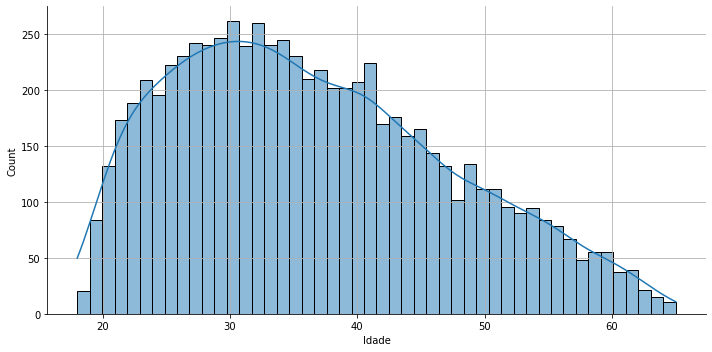

In [55]:
sns.displot(data=df_trajeto['Idade'], kde=True, bins=len(df_trajeto['Idade'].unique()), height=5, aspect=2)
plt.grid()
plt.savefig('Apresentação\\V1\\idade-trajetos')


In [56]:
occur_data_trajetos = df_trajeto.groupby(['Data Acidente.1']).size().reset_index()
occur_data_trajetos.columns = ['Idade', 'Total_Acidentes']
occur_data_trajetos['%Total'] = round((occur_data_trajetos['Total_Acidentes']/sum(occur_data_trajetos['Total_Acidentes']))*50, 2)
occur_data_trajetos.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_data_trajetos.head()

,Idade,Total_Acidentes,%Total
0,0,1456,10.21
2,2,1338,9.39
1,1,1305,9.16
4,4,1247,8.75
3,3,1231,8.64


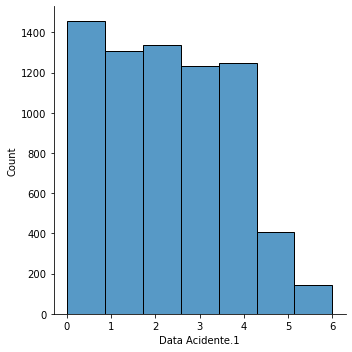

In [57]:
sns.displot(df_trajeto['Data Acidente.1'], bins=len(df_trajeto['Data Acidente.1'].unique()))
plt.show()

In [11]:
df_trajeto2 = df2.loc[df2['Tipo do Acidente'] == 'Trajeto',:]

occur_agente_trajetos2 = df_tipicos2.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_trajetos2.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_trajetos2['%Total'] = round((occur_agente_trajetos2['Total_Acidentes']/sum(occur_agente_trajetos2['Total_Acidentes']))*100, 2)
occur_agente_trajetos2.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_trajetos2.head()

,Agente_Causador,Total_Acidentes,%Total
259,Metal - Inclui Liga,5098,9.39
82,Chao - Superficie Ut,1844,3.40
145,Escada Movel ou Fixa,1763,3.25
231,"Madeira (Toro, Madei",1610,2.96
19,"Andaime, Plataforma",1598,2.94


In [59]:
occur_cbo_trajetos.to_csv('top10-trajetos\\cbo.csv')
occur_cnae_trajetos.to_csv('top10-trajetos\\cnae.csv')
occur_agente_trajetos.to_csv('top10-trajetos\\agente.csv')
occur_cid_trajetos.to_csv('top10-trajetos\\cid.csv')
occur_natureza_trajetos.to_csv('top10-trajetos\\natureza.csv')

occur_parte_corpo_trajetos.to_csv('top10-trajetos\\parte-corpo.csv')
occur_sexo_trajetos.to_csv('top10-trajetos\\sexo.csv')
occur_idade_trajetos.to_csv('top10-trajetos\\idade.csv')
occur_data_trajetos.to_csv('top10-trajetos\\data.csv')



In [12]:
occur_agente_trajetos2.to_csv('top10-trajetos\\agente2.csv')

## Tipo = Doença

In [4]:
df_doenca = df.loc[df['Tipo do Acidente'] == 'Doença',:]
df_doenca['Tipo do Acidente'].unique()

array(['Doença'], dtype=object)

In [60]:
occur_cbo_doencas = df_doenca.groupby(['CBO']).size().reset_index()
occur_cbo_doencas.columns = ['CBO', 'Total_Acidentes']
occur_cbo_doencas['%Total'] = round((occur_cbo_doencas['Total_Acidentes']/sum(occur_cbo_doencas['Total_Acidentes']))*100, 2)
occur_cbo_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cbo_doencas.head(5)

,CBO,Total_Acidentes,%Total
36,Trabalhadores da construção civil e obras públ...,110,26.51
0,Ajudantes de obras,77,18.55
2,Condutores de veículos e operadores de equipam...,30,7.23
41,"Trabalhadores de montagem de tubulações, estru...",29,6.99
38,Trabalhadores de acabamento de obras,18,4.34


In [61]:
occur_cnae_doencas = df_doenca.groupby(['CNAE2.0 Empregador.1']).size().reset_index()
occur_cnae_doencas.columns = ['CNAE', 'Total_Acidentes']
occur_cnae_doencas['%Total'] = round((occur_cnae_doencas['Total_Acidentes']/sum(occur_cnae_doencas['Total_Acidentes']))*50, 2)
occur_cnae_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cnae_doencas.head(5)

,CNAE,Total_Acidentes,%Total
0,Construcao de Edific,142,17.11
14,Servicos Especializa,56,6.75
3,Construcao de Rodovi,50,6.02
1,Construcao de Obras,30,3.61
5,Instalacoes Eletrica,28,3.37


In [62]:
occur_agente_doencas = df_doenca.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_doencas.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_doencas['%Total'] = round((occur_agente_doencas['Total_Acidentes']/sum(occur_agente_doencas['Total_Acidentes']))*100, 2)
occur_agente_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_doencas

,Agente_Causador,Total_Acidentes,%Total
3,M,129,31.08
1,E,120,28.92
0,B,80,19.28
2,F,46,11.08
4,Q,40,9.64


In [63]:
occur_cid_doencas = df_doenca.groupby(['CID-10']).size().reset_index()
occur_cid_doencas.columns = ['CID', 'Total_Acidentes']
occur_cid_doencas['%Total'] = round((occur_cid_doencas['Total_Acidentes']/sum(occur_cid_doencas['Total_Acidentes']))*100, 2)
occur_cid_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_cid_doencas.head(5)

,CID,Total_Acidentes,%Total
10,Doenças do sistema osteomuscular e do tecido c...,113,27.23
12,"Lesões, envenenamentos e algumas outras conseq...",81,19.52
15,algumas doenças infecciosas e parasitárias,62,14.94
8,Doenças do ouvido e da apófise mastóide\t,41,9.88
5,Doenças do aparelho digestivo\t,39,9.40


In [64]:
occur_natureza_doencas = df_doenca.groupby(['Natureza da Lesão']).size().reset_index()
occur_natureza_doencas.columns = ['Natureza', 'Total_Acidentes']
occur_natureza_doencas['%Total'] = round((occur_natureza_doencas['Total_Acidentes']/sum(occur_natureza_doencas['Total_Acidentes']))*100, 2)
occur_natureza_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_natureza_doencas.head(5)

,Natureza,Total_Acidentes,%Total
9,"Doenca, Nic",149,35.90
21,Perda ou Diminuicao,43,10.36
14,Inflamacao de Articu,41,9.88
13,Hernia de Qualquer N,33,7.95
12,Fratura,31,7.47


In [65]:
occur_parte_corpo_doencas = df_doenca.groupby(['Parte Corpo Atingida']).size().reset_index()
occur_parte_corpo_doencas.columns = ['Parte Corpo', 'Total_Acidentes']
occur_parte_corpo_doencas['%Total'] = round((occur_parte_corpo_doencas['Total_Acidentes']/sum(occur_parte_corpo_doencas['Total_Acidentes']))*100, 2)
occur_parte_corpo_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_parte_corpo_doencas.head(5)

,Parte Corpo,Total_Acidentes,%Total
13,Dorso (Inclusive Mus,53,12.77
22,"Ouvido (Externo, Med",43,10.36
0,Abdome (Inclusive Or,41,9.88
32,Sistemas e Aparelhos,37,8.92
21,Ombro,30,7.23


In [66]:
occur_sexo_doencas = df_doenca.groupby(['Sexo']).size().reset_index()
occur_sexo_doencas.columns = ['Sexo', 'Total_Acidentes']
occur_sexo_doencas['%Total'] = round((occur_sexo_doencas['Total_Acidentes']/sum(occur_sexo_doencas['Total_Acidentes']))*100, 2)
occur_sexo_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_sexo_doencas

,Sexo,Total_Acidentes,%Total
1,Masculino,389,93.73
0,Feminino,26,6.27


In [67]:
occur_idade_doencas = df_doenca.groupby(['Idade']).size().reset_index()
occur_idade_doencas.columns = ['Idade', 'Total_Acidentes']
occur_idade_doencas['%Total'] = round((occur_idade_doencas['Total_Acidentes']/sum(occur_idade_doencas['Total_Acidentes']))*100, 2)
occur_idade_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_idade_doencas.head()

,Idade,Total_Acidentes,%Total
20,38,25,6.02
24,42,19,4.58
22,40,19,4.58
26,44,17,4.10
27,45,15,3.61


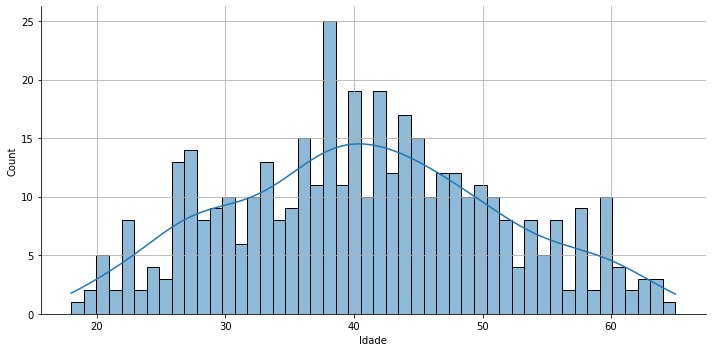

In [68]:
sns.displot(df_doenca['Idade'], kde=True, bins=len(df_doenca['Idade'].unique()), height=5, aspect=2)
plt.grid()
plt.savefig('Apresentação\\V1\\idade-doenca')
plt.show()

In [69]:
occur_data_doencas = df_doenca.groupby(['Data Acidente.1']).size().reset_index()
occur_data_doencas.columns = ['Idade', 'Total_Acidentes']
occur_data_doencas['%Total'] = round((occur_data_doencas['Total_Acidentes']/sum(occur_data_doencas['Total_Acidentes']))*100, 2)
occur_data_doencas.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_data_doencas.head()

,Idade,Total_Acidentes,%Total
2,2,90,21.69
0,0,80,19.28
4,4,80,19.28
1,1,67,16.14
3,3,59,14.22


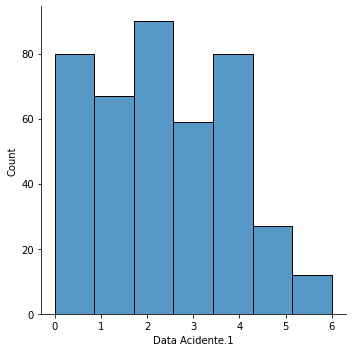

In [70]:
sns.displot(df_doenca['Data Acidente.1'], bins=len(df_doenca['Data Acidente.1'].unique()))
plt.show()

In [13]:
df_doenca2 = df2.loc[df2['Tipo do Acidente'] == 'Doença',:]
df_doenca2['Tipo do Acidente'].unique()

array(['Doença'], dtype=object)

In [14]:
occur_agente_doencas2 = df_doenca2.groupby(['Agente  Causador  Acidente']).size().reset_index()
occur_agente_doencas2.columns = ['Agente_Causador', 'Total_Acidentes']
occur_agente_doencas2['%Total'] = round((occur_agente_doencas2['Total_Acidentes']/sum(occur_agente_doencas2['Total_Acidentes']))*100, 2)
occur_agente_doencas2.sort_values(by='Total_Acidentes', ascending=False, inplace=True)
occur_agente_doencas2.head()

,Agente_Causador,Total_Acidentes,%Total
87,Reacao do Corpo a Mo,81,13.39
43,"Esforco Excessivo, N",61,10.08
39,Esforco Excessivo ao,61,10.08
91,"Ruido, Exposicao A",36,5.95
1,Agente Infeccioso ou,32,5.29


In [198]:
occur_cbo_doencas.to_csv('top10-doencas\\cbo.csv')
occur_cnae_doencas.to_csv('top10-doencas\\cnae.csv')
occur_agente_doencas.to_csv('top10-doencas\\agente.csv')
occur_cid_doencas.to_csv('top10-doencas\\cid.csv')
occur_natureza_doencas.to_csv('top10-doencas\\natureza.csv')

occur_parte_corpo_doencas.to_csv('top10-doencas\\parte-corpo.csv')
occur_sexo_doencas.to_csv('top10-doencas\\sexo.csv')
occur_idade_doencas.to_csv('top10-doencas\\idade.csv')
occur_data_doencas.to_csv('top10-doencas\\data.csv')



In [15]:
occur_agente_doencas2.to_csv('top10-doencas\\agente2.csv')

## Uma análise sobre a fatalidade

In [17]:
df_mortes = df.loc[df['Indica acidente'] == 'Sim',:]

df_mortes2 = df2.loc[df2['Indica acidente'] == 'Sim',:]

In [18]:
# Repetições - Considerando todos os acidentes
occur_agente = df.groupby(['Agente  Causador  Acidente']).size()
occur_cbo = df.groupby(['CBO']).size()
occur_cid = df.groupby(['CID-10']).size()
occur_cnae = df.groupby(['CNAE2.0 Empregador.1']).size()
occur_data = df.groupby(['Data Acidente.1']).size()
occur_idade = df.groupby(['Idade']).size()
occur_sexo = df.groupby(['Sexo']).size()
occur_natureza = df.groupby(['Natureza da Lesão']).size()
occur_parteCorpo = df.groupby(['Parte Corpo Atingida']).size()

occur_tipo = df2.groupby(['Tipo do Acidente']).size()
occur_agente2 = df2.groupby(['Agente  Causador  Acidente']).size()

In [19]:
# Repetições - Considerando acidentes fatais
occur_fatais_agente = df_mortes.groupby(['Agente  Causador  Acidente']).size()
occur_fatais_cbo = df_mortes.groupby(['CBO']).size()
occur_fatais_cid = df_mortes.groupby(['CID-10']).size()
occur_fatais_cnae = df_mortes.groupby(['CNAE2.0 Empregador.1']).size()
occur_fatais_data = df_mortes.groupby(['Data Acidente.1']).size()
occur_fatais_idade = df_mortes.groupby(['Idade']).size()
occur_fatais_sexo = df_mortes.groupby(['Sexo']).size()
occur_fatais_natureza = df_mortes.groupby(['Natureza da Lesão']).size()
occur_fatais_parteCorpo = df_mortes.groupby(['Parte Corpo Atingida']).size()

occur_fatais_tipo = df_mortes2.groupby(['Tipo do Acidente']).size()
occur_fatais_agente2 = df_mortes2.groupby(['Agente  Causador  Acidente']).size()

In [20]:
# Agentes
occur_agente = occur_agente.reset_index()
occur_fatais_agente = occur_fatais_agente.reset_index()
occur_agente = occur_agente.merge(occur_fatais_agente, how='left', on='Agente  Causador  Acidente')
occur_agente.columns = ['Agentes', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_agente['Fatais/Totais-%'] = (occur_agente['Acidentes-Fatais'] / occur_agente['Acidentes-Totais']) * 100
occur_agente.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_agente.head(5)

,Agentes,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
261,Metal - Inclui Liga,5133,3.0,0.058445
269,"Motocicleta, Motonet",3117,27.0,0.866218
452,"Veiculo, Nic",2497,55.0,2.202643
82,Chao - Superficie Ut,2065,5.0,0.242131
446,Veiculo Rodoviario M,2056,71.0,3.453307


In [21]:
# CBO
occur_cbo = occur_cbo.reset_index()
occur_fatais_cbo = occur_fatais_cbo.reset_index()
occur_cbo = occur_cbo.merge(occur_fatais_cbo, how='left', on='CBO')
occur_cbo.columns = ['CBO', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_cbo['Fatais/Totais-%'] = (occur_cbo['Acidentes-Fatais'] / occur_cbo['Acidentes-Totais']) * 100
occur_cbo.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_cbo.head(5)

,CBO,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
544,717020,12980,93.0,0.716487
489,715210,5228,46.0,0.879878
1112,717020,2859,15.0,0.524659
502,715505,2155,13.0,0.603248
514,715615,1640,16.0,0.975610


In [22]:
# CID
occur_cid = occur_cid.reset_index()
occur_fatais_cid = occur_fatais_cid.reset_index()
occur_cid = occur_cid.merge(occur_fatais_cid, how='left', on='CID-10')
occur_cid.columns = ['CID-10', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_cid['Fatais/Totais-%'] = (occur_cid['Acidentes-Fatais'] / occur_cid['Acidentes-Totais']) * 100
occur_cid.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_cid.head(5)

,CID-10,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
1605,S626,2521,NaN,NaN
1584,S610,2253,NaN,NaN
1909,S934,1451,NaN,NaN
1585,S611,1240,NaN,NaN
1572,S600,1050,NaN,NaN


In [23]:
# CNAE
occur_cnae = occur_cnae.reset_index()
occur_fatais_cnae = occur_fatais_cnae.reset_index()
occur_cnae = occur_cnae.merge(occur_fatais_cnae, how='left', on='CNAE2.0 Empregador.1')
occur_cnae.columns = ['CNAE2.0 Empregador.1', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_cnae['Fatais/Totais-%'] = (occur_cnae['Acidentes-Fatais'] / occur_cnae['Acidentes-Totais']) * 100
occur_cnae.sort_values(by='Acidentes-Totais', ascending=True, inplace=True)
occur_cnae.head(5)

,CNAE2.0 Empregador.1,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
29,Servicos de Preparacao do Terreno nao Especif,20,NaN,NaN
9,Demolicao e Preparacao de Canteiros de Obras,34,2.0,5.882353
25,Perfuracoes e Sondagens,50,NaN,NaN
28,Servicos de Preparac,106,2.0,1.886792
8,Demolicao e Preparac,146,1.0,0.684932


In [24]:
# Data
occur_data = occur_data.reset_index()
occur_fatais_data = occur_fatais_data.reset_index()
occur_data = occur_data.merge(occur_fatais_data, how='left', on='Data Acidente.1')
occur_data.columns = ['Data Acidente', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_data['Fatais/Totais-%'] = (occur_data['Acidentes-Fatais'] / occur_data['Acidentes-Totais']) * 100
occur_data.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_data.head(5)

,Data Acidente,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
0,0,12900,108,0.837209
2,2,12407,78,0.628677
1,1,12349,86,0.696413
3,3,11744,106,0.902589
4,4,9929,97,0.976936


In [25]:
# Idade
occur_idade = occur_idade.reset_index()
occur_fatais_idade = occur_fatais_idade.reset_index()
occur_idade = occur_idade.merge(occur_fatais_idade, how='left', on='Idade')
occur_idade.columns = ['Idade', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_idade['Fatais/Totais-%'] = (occur_idade['Acidentes-Fatais'] / occur_idade['Acidentes-Totais']) * 100
occur_idade.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_idade.head(5)

,Idade,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
12,30,2207,12.0,0.543725
14,32,2201,18.0,0.817810
15,33,2166,21.0,0.969529
13,31,2149,17.0,0.791066
17,35,2098,15.0,0.714967


In [26]:
occur_idade.sort_values(by='Idade', ascending=True, inplace=True)
occur_idade.head()

,Idade,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
0,18,111,NaN,NaN
1,19,647,7.0,1.081917
2,20,1094,5.0,0.457038
3,21,1374,8.0,0.582242
4,22,1542,4.0,0.259403


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


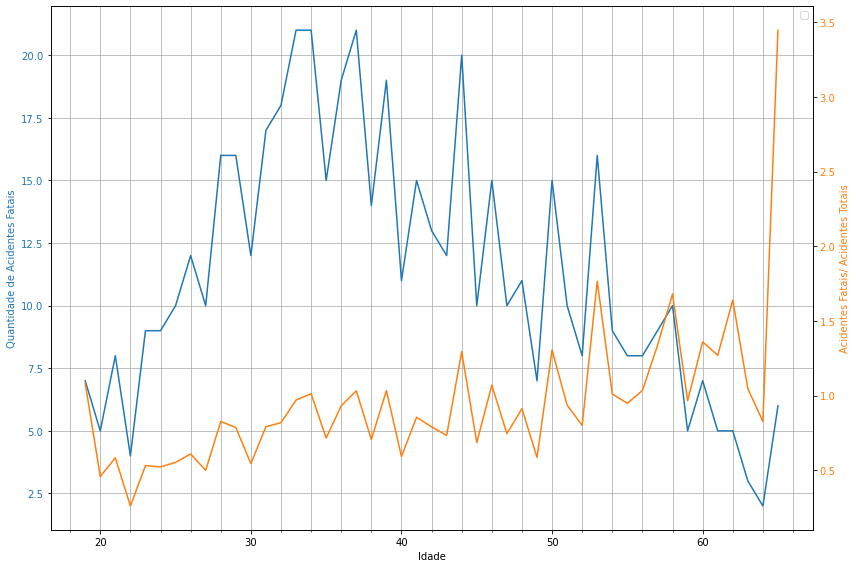

In [27]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
fig, ax1 = plt.subplots()


color = 'tab:blue'
ax1.set_xlabel('Idade')
ax1.set_ylabel('Quantidade de Acidentes Fatais', color=color)
ax1.plot(occur_idade['Idade'], occur_idade['Acidentes-Fatais'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_minor_locator(MultipleLocator(1)) 
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.grid(which='both')

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('Acidentes Fatais/ Acidentes Totais', color=color) 
ax2.plot(occur_idade['Idade'], occur_idade['Fatais/Totais-%'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.figure.set_size_inches(12,8)
fig.tight_layout() 
plt.legend()
plt.savefig('Apresentação\\V1\\acidentes-fatais-idade')
plt.show()

In [28]:
# Sexo
occur_sexo = occur_sexo.reset_index()
occur_fatais_sexo = occur_fatais_sexo.reset_index()
occur_sexo = occur_sexo.merge(occur_fatais_sexo, how='left', on='Sexo')
occur_sexo.columns = ['Sexo', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_sexo['Fatais/Totais-%'] = (occur_sexo['Acidentes-Fatais'] / occur_sexo['Acidentes-Totais']) * 100
occur_sexo.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_sexo.head(5)

,Sexo,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
1,Masculino,61808,525,0.849405
0,Feminino,2267,7,0.308778


In [29]:
# Natureza
occur_natureza = occur_natureza.reset_index()
occur_fatais_natureza = occur_fatais_natureza.reset_index()
occur_natureza = occur_natureza.merge(occur_fatais_natureza, how='left', on='Natureza da Lesão')
occur_natureza.columns = ['Natureza', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_natureza['Fatais/Totais-%'] = (occur_natureza['Acidentes-Fatais'] / occur_natureza['Acidentes-Totais']) * 100
occur_natureza.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_natureza.head(5)

,Natureza,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
28,Fratura,15587,41.0,0.263040
11,"Corte, Laceracao, Fe",10755,7.0,0.065086
9,"Contusao, Esmagament",6267,26.0,0.414872
36,"Lesao Imediata, Nic",5859,50.0,0.853388
15,"Distensao, Torcao",4968,NaN,NaN


In [30]:
# CBO
occur_parteCorpo = occur_parteCorpo.reset_index()
occur_fatais_parteCorpo = occur_fatais_parteCorpo.reset_index()
occur_parteCorpo = occur_parteCorpo.merge(occur_fatais_parteCorpo, how='left', on='Parte Corpo Atingida')
occur_parteCorpo.columns = ['Parte Corpo', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_parteCorpo['Fatais/Totais-%'] = (occur_parteCorpo['Acidentes-Fatais'] / occur_parteCorpo['Acidentes-Totais']) * 100
occur_parteCorpo.sort_values(by='Acidentes-Totais', ascending=True, inplace=True)
occur_parteCorpo.head(5)

,Parte Corpo,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
33,"Localizacao da Lesao, Nic",4,NaN,NaN
4,Aparelho Circulatori,7,2.0,28.571429
67,"Sistemas e Aparelhos, Nic",8,NaN,NaN
7,Aparelho Genito-Urinario,9,NaN,NaN
32,Localizacao da Lesao,10,2.0,20.000000


In [31]:
occur_parteCorpo.sort_values(by='Acidentes-Fatais', ascending=False, inplace=True)
occur_parteCorpo_sub = occur_parteCorpo.reset_index(drop=True).iloc[:5,:]
occur_parteCorpo_sub

,Parte Corpo,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
0,Partes Multiplas - A,1904,102.0,5.357143
1,"Cabeca, Partes Multi",786,60.0,7.633588
2,"Cabeca, Nic",1900,49.0,2.578947
3,Cranio (Inclusive En,152,36.0,23.684211
4,Torax (Inclusive Org,669,35.0,5.231689


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


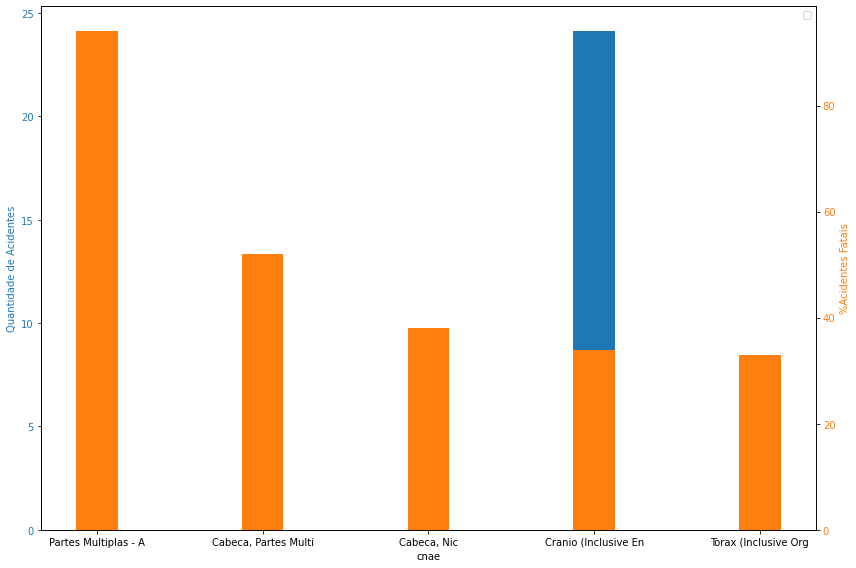

In [89]:
fig, ax1 = plt.subplots()


color = 'tab:blue'
ax1.set_xlabel('cnae')
ax1.set_ylabel('Quantidade de Acidentes', color=color)
ax1.bar(occur_parteCorpo_sub['Parte Corpo'], occur_parteCorpo_sub['Fatais/Totais-%'], color=color, width=0.25)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel('%Acidentes Fatais', color=color) 
ax2.bar(occur_parteCorpo_sub['Parte Corpo'], occur_parteCorpo_sub['Acidentes-Fatais'], color=color, width=0.25)
ax2.tick_params(axis='y', labelcolor=color)
fig.figure.set_size_inches(12,8)
fig.tight_layout() 
plt.legend()
plt.show()


In [32]:
# Agentes2
occur_agente2 = occur_agente2.reset_index()
occur_fatais_agente2 = occur_fatais_agente2.reset_index()
occur_agente2 = occur_agente2.merge(occur_fatais_agente2, how='left', on='Agente  Causador  Acidente')
occur_agente2.columns = ['Agentes', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_agente2['Fatais/Totais-%'] = (occur_agente2['Acidentes-Fatais'] / occur_agente2['Acidentes-Totais']) * 100
occur_agente2.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_agente2.head(5)

,Agentes,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
261,Metal - Inclui Liga,5133,3.0,0.058445
269,"Motocicleta, Motonet",3117,27.0,0.866218
452,"Veiculo, Nic",2497,55.0,2.202643
82,Chao - Superficie Ut,2065,5.0,0.242131
446,Veiculo Rodoviario M,2056,71.0,3.453307


In [91]:
occur_agente.to_csv('fatalidades\\agente.csv')
occur_cbo.to_csv('fatalidades\\cbo.csv', encoding='Latin-1')
occur_cid.to_csv('fatalidades\\cid.csv')
occur_cnae.to_csv('fatalidades\\cnae.csv')
occur_data.to_csv('fatalidades\\data.csv')
occur_idade.to_csv('fatalidades\\idade.csv')
occur_sexo.to_csv('fatalidades\\sexo.csv')
occur_natureza.to_csv('fatalidades\\natureza.csv')
occur_parteCorpo.to_csv('fatalidades\\parte-corpo.csv')


In [33]:
occur_agente2.to_csv('fatalidades\\agente2.csv')

In [92]:
occur_tipo

Tipo do Acidente
Doença        705
Ignorado        1
Trajeto      8863
Típico      54583
dtype: int64

In [93]:
# Tipo
occur_tipo = occur_tipo.reset_index()
occur_fatais_tipo = occur_fatais_tipo.reset_index()
occur_tipo = occur_tipo.merge(occur_fatais_tipo, how='left', on='Tipo do Acidente')
occur_tipo.columns = ['Tipo', 'Acidentes-Totais', 'Acidentes-Fatais']
occur_tipo['Fatais/Totais-%'] = (occur_tipo['Acidentes-Fatais'] / occur_tipo['Acidentes-Totais']) * 100
occur_tipo.sort_values(by='Acidentes-Totais', ascending=False, inplace=True)
occur_tipo.head(5)

,Tipo,Acidentes-Totais,Acidentes-Fatais,Fatais/Totais-%
3,Típico,54583,403.0,0.738325
2,Trajeto,8863,126.0,1.421641
0,Doença,705,4.0,0.567376
1,Ignorado,1,NaN,NaN


In [94]:
acidentes_fatais_mes = pd.DataFrame()
df2_fatais = df2.loc[df2['Indica acidente'] == 'Sim',:]

for i in range(2018,2022):
    for j in range(1,13):
        if((i == 2018 and j<=6) or(i == 2021 and j>6)):
            continue
        else:
            coluna = str(j)+'/'+str(i)
            if(j == 12):
                prov = df2_fatais.loc[df2_fatais['Data Acidente.1'] < pd.Timestamp(i+1, 1, 1), :]
                prov = prov.loc[df2_fatais['Data Acidente.1'] >= pd.Timestamp(i, j, 1), :]
            else:
                prov = df2_fatais.loc[df2_fatais['Data Acidente.1'] < pd.Timestamp(i, j+1, 1), :]
                prov = prov.loc[df2_fatais['Data Acidente.1'] >= pd.Timestamp(i, j, 1), :]
            acidentes_fatais_mes.loc[1, coluna] = len(prov.loc[prov['Tipo do Acidente'] == 'Típico',:])
            acidentes_fatais_mes.loc[2, coluna] = len(prov.loc[prov['Tipo do Acidente'] == 'Trajeto',:])
            acidentes_fatais_mes.loc[3, coluna] = len(prov.loc[prov['Tipo do Acidente'] == 'Doença',:])
acidentes_fatais_mes.index = ['Típica', 'Trajeto', 'Doença']


acidentes_fatais_mes = (acidentes_fatais_mes.T).reset_index()
acidentes_fatais_mes.head()

acidentes_fatais_mes['index'] = pd.to_datetime(acidentes_fatais_mes['index'], format='%m/%Y') 
acidentes_fatais_mes['Típica MM3'] = pd.DataFrame(acidentes_fatais_mes['Típica'].values).rolling(window=3).mean().values
acidentes_fatais_mes['Trajeto MM3'] = pd.DataFrame(acidentes_fatais_mes['Trajeto'].values).rolling(window=3).mean().values
acidentes_fatais_mes['Doença MM3'] = pd.DataFrame(acidentes_fatais_mes['Doença'].values).rolling(window=3).mean().values

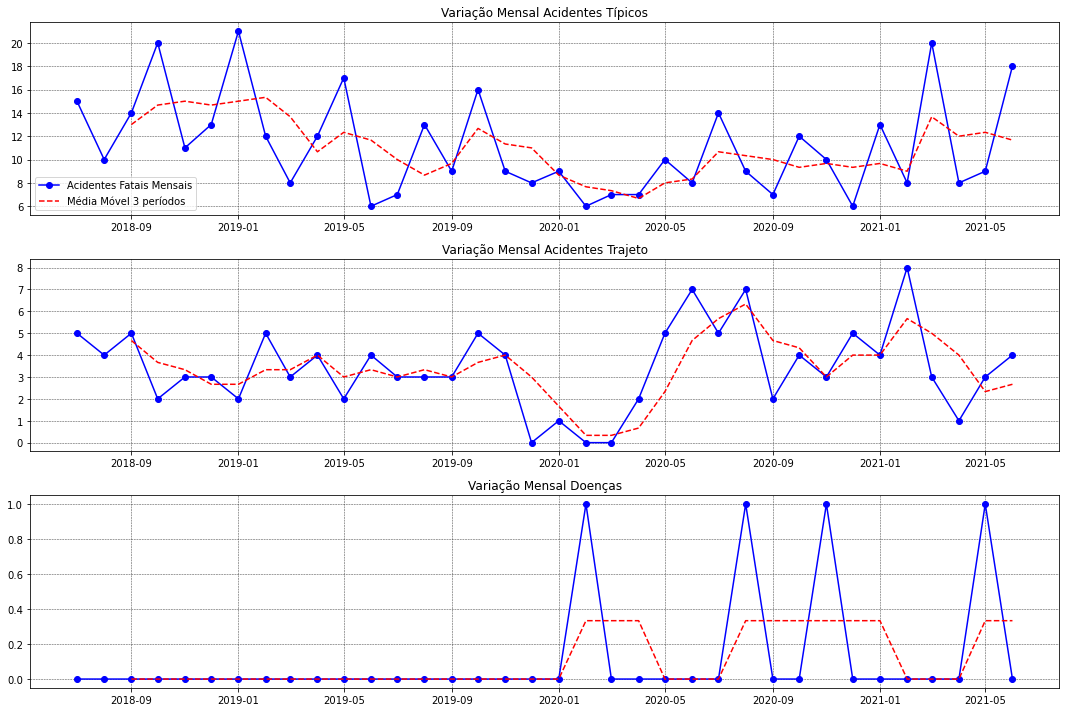

In [95]:
fig, ax = plt.subplots(3, 1, figsize=(15,10))

ax[0].plot(acidentes_fatais_mes['index'].values, acidentes_fatais_mes['Típica'].values, marker ='o', color='blue', label='Acidentes Fatais Mensais')
ax[0].plot(acidentes_fatais_mes['index'].values, acidentes_fatais_mes['Típica MM3'].values, color = 'red', ls='--', label='Média Móvel 3 períodos')
ax[0].set_title('Variação Mensal Acidentes Típicos')
ax[0].legend(loc = 0)
ax[0].grid(linestyle="--", linewidth=0.5, color='.25')
ax[1].plot(acidentes_fatais_mes['index'].values, acidentes_fatais_mes['Trajeto'].values, marker ='o', color='blue', label='Acidentes Fatais Mensais')
ax[1].plot(acidentes_fatais_mes['index'].values, acidentes_fatais_mes['Trajeto MM3'].values, color = 'red', ls='--', label='Média Móvel 3 períodos')
ax[1].set_title('Variação Mensal Acidentes Trajeto')
ax[1].grid(linestyle="--", linewidth=0.5, color='.25')
#ax[1].legend(loc = 0)
ax[2].plot(acidentes_fatais_mes['index'].values, acidentes_fatais_mes['Doença'].values, marker ='o', color='blue', label='Acidentes Fatais Mensais')
ax[2].plot(acidentes_fatais_mes['index'].values, acidentes_fatais_mes['Doença MM3'].values, color = 'red', ls='--', label='Média Móvel 3 períodos')
ax[2].set_title('Variação Mensal Doenças')
ax[2].grid(linestyle="--", linewidth=0.5, color='.25')
#ax[2].legend(loc = 0)
plt.savefig('Apresentação\\V1\\variacao-tipo-tempo-acidentes-fatais')
plt.tight_layout()

In [96]:
df2_fatais.to_csv('Acidentes-fatais.csv')

# Aplicando alguns testes estatísticos

## Transformando em labels em números usando LabelEnconder
## Aplicando Chi-squared
## Aplicando ANOVA

In [97]:
from sklearn.preprocessing import LabelEncoder

label_encoder  = LabelEncoder()

In [98]:
# Copiando nosso dataframe

df_copia = df.copy()

# Usando o Label Enconder no nosso dataframe copiado para transformar variáveis categoricas em numericas
for coluna in df.columns:
    if(df_copia[coluna].dtype == 'object'):
        label_coluna = label_encoder.fit_transform(df_copia[coluna].astype(str))
        df_copia[coluna] = label_coluna

In [99]:
df_copia.head()

,Agente Causador Acidente,CBO,CID-10,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,Filiação Segurado,Indica acidente,Munic Empr,Natureza da Lesão,Origem de Cadastramento CAT,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Empregador,Data Acidente.1,Idade
0,3,30,16,4329,10,1,1,0,0,22,5,0,10,1,2,43,1,33
1,3,2,16,4213,12,1,1,0,0,16,15,0,35,1,2,31,1,49
2,3,89,12,4399,14,1,1,0,0,21,17,0,1,1,2,42,2,36
4,3,130,16,4321,5,1,1,0,0,19,8,0,30,1,2,35,2,44
5,3,16,16,4329,10,1,1,0,0,19,0,0,16,1,2,35,6,39


## Aplicando o Chi-Squared

In [100]:
# Importar metrica
from sklearn.feature_selection import chi2

In [101]:
df_copia.columns

Index(['Agente  Causador  Acidente', 'CBO', 'CID-10', 'CNAE2.0 Empregador',
       'CNAE2.0 Empregador.1', 'Emitente CAT', 'Espécie do benefício',
       'Filiação Segurado', 'Indica acidente', 'Munic Empr',
       'Natureza da Lesão', 'Origem de Cadastramento CAT',
       'Parte Corpo Atingida', 'Sexo', 'Tipo do Acidente',
       'UF Munic. Empregador', 'Data Acidente.1', 'Idade'],
      dtype='object')

In [102]:
# Split dataset
X = df_copia.drop(['CNAE2.0 Empregador', 'Emitente CAT', 'Espécie do benefício', 'Filiação Segurado', 
                   'Munic Empr', 'Origem de Cadastramento CAT','Tipo do Acidente','UF Munic. Empregador'], axis=1)
y = df_copia['Tipo do Acidente']

In [103]:
X.columns

Index(['Agente  Causador  Acidente', 'CBO', 'CID-10', 'CNAE2.0 Empregador.1',
       'Indica acidente', 'Natureza da Lesão', 'Parte Corpo Atingida', 'Sexo',
       'Data Acidente.1', 'Idade'],
      dtype='object')

In [104]:
# Calculando Chi-Squared
chi_scores = chi2(X,y)

In [105]:
# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

In [106]:
# Results
chi2_target_tipoAcidente = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})
chi2_target_tipoAcidente

,Chi2,p-Value
Agente Causador Acidente,229.814934,1.248306e-50
CBO,298.425369,1.576720e-65
CID-10,193.465456,9.761355e-43
CNAE2.0 Empregador.1,26.094137,2.156405e-06
Indica acidente,40.336194,1.742235e-09
Natureza da Lesão,1944.502306,0.000000e+00
Parte Corpo Atingida,1405.302791,6.956268e-306
Sexo,21.186445,2.508545e-05
Data Acidente.1,9.176611,1.017008e-02
Idade,278.030759,4.230461e-61


In [107]:
# Split dataset
X = df_copia.drop(['Agente  Causador  Acidente', 'CNAE2.0 Empregador', 'Emitente CAT', 'Espécie do benefício', 'Filiação Segurado', 
                   'Munic Empr', 'Origem de Cadastramento CAT','UF Munic. Empregador'], axis=1)
y = df_copia['Agente  Causador  Acidente']

In [108]:
# Calculando Chi-Squared
chi_scores = chi2(X,y)

# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

In [109]:
# Results
chi2_target_tipoAgente = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})
chi2_target_tipoAgente

,Chi2,p-Value
CBO,2805.492168,0.000000e+00
CID-10,3027.074170,0.000000e+00
CNAE2.0 Empregador.1,179.369455,1.018479e-37
Indica acidente,18.645286,9.226107e-04
Natureza da Lesão,858.327101,1.779393e-184
Parte Corpo Atingida,193.691058,8.532223e-41
Sexo,5.359740,2.523363e-01
Tipo do Acidente,121.679560,2.338229e-25
Data Acidente.1,12.807259,1.225699e-02
Idade,220.706561,1.320937e-46


In [110]:
X.head()

,CBO,CID-10,CNAE2.0 Empregador.1,Indica acidente,Natureza da Lesão,Parte Corpo Atingida,Sexo,Tipo do Acidente,Data Acidente.1,Idade
0,30,16,10,0,5,10,1,2,1,33
1,2,16,12,0,15,35,1,2,1,49
2,89,12,14,0,17,1,1,2,2,36
4,130,16,5,0,8,30,1,2,2,44
5,16,16,10,0,0,16,1,2,6,39


## Aplicando o ANOVA

In [111]:
df_anova = df_copia.drop(['CNAE2.0 Empregador', 'Emitente CAT', 'Espécie do benefício', 'Filiação Segurado', 
                   'Munic Empr', 'Origem de Cadastramento CAT','UF Munic. Empregador'], axis=1)
df_anova.head()

,Agente Causador Acidente,CBO,CID-10,CNAE2.0 Empregador.1,Indica acidente,Natureza da Lesão,Parte Corpo Atingida,Sexo,Tipo do Acidente,Data Acidente.1,Idade
0,3,30,16,10,0,5,10,1,2,1,33
1,3,2,16,12,0,15,35,1,2,1,49
2,3,89,12,14,0,17,1,1,2,2,36
4,3,130,16,5,0,8,30,1,2,2,44
5,3,16,16,10,0,0,16,1,2,6,39


In [112]:
import statsmodels.api as sm
# Importando library
import pingouin as pg

In [113]:
aov = []
for variance in df_anova.columns[1:]:
    v = pg.anova(data=df_anova, dv='Agente  Causador  Acidente', between=variance, detailed=True).round(3)
    aov.append(v)

In [114]:
anova_target_tipoAgente = pd.concat(aov)
anova_target_tipoAgente

,Source,SS,DF,MS,F,p-unc,np2
0,CBO,527.656,144,3.664,9.782,0.000,0.027
1,Within,18816.968,50235,0.375,NaN,NaN,NaN
0,CID-10,1376.666,21,65.556,183.730,0.000,0.071
1,Within,17967.958,50358,0.357,NaN,NaN,NaN
0,CNAE2.0 Empregador.1,113.152,15,7.543,19.755,0.000,0.006
1,Within,19231.472,50364,0.382,NaN,NaN,NaN
0,Indica acidente,0.301,1,0.301,0.784,0.376,0.000
1,Within,19344.323,50378,0.384,NaN,NaN,NaN
0,Natureza da Lesão,1367.433,27,50.646,141.853,0.000,0.071
1,Within,17977.191,50352,0.357,NaN,NaN,NaN


In [138]:
chi2_target_tipoAcidente.to_csv('estatisticas\\chi2_target_tipoAcidente.csv')
chi2_target_tipoAgente.to_csv('estatisticas\\chi2_target_tipoAgente.csv')
anova_target_tipoAgente.to_csv('estatisticas\\anova_target_tipoAgente.csv')

# Aqui vai ser a implementação do KModes, preciso que você estude sobre as métricas que tem e o que podemos tirar de insight, ainda preciso ler melhor a doc

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50380 entries, 0 to 52770
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Agente  Causador  Acidente   50380 non-null  object
 1   CBO                          50380 non-null  object
 2   CID-10                       50380 non-null  object
 3   CNAE2.0 Empregador           50380 non-null  int64 
 4   CNAE2.0 Empregador.1         50380 non-null  object
 5   Emitente CAT                 50380 non-null  object
 6   Espécie do benefício         50380 non-null  object
 7   Filiação Segurado            50380 non-null  object
 8   Indica acidente              50380 non-null  object
 9   Munic Empr                   50380 non-null  object
 10  Natureza da Lesão            50380 non-null  object
 11  Origem de Cadastramento CAT  50380 non-null  object
 12  Parte Corpo Atingida         50380 non-null  object
 13  Sexo                         50

In [124]:
df_categorico = df.drop(['CNAE2.0 Empregador', 'UF Munic. Empregador','Emitente CAT', 'Espécie do benefício', 
                         'Data Acidente.1', 'Filiação Segurado', 'Indica acidente', 'Munic Empr', 'Origem de Cadastramento CAT', 'Idade'], axis=1)
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50380 entries, 0 to 52770
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Agente  Causador  Acidente  50380 non-null  object
 1   CBO                         50380 non-null  object
 2   CID-10                      50380 non-null  object
 3   CNAE2.0 Empregador.1        50380 non-null  object
 4   Natureza da Lesão           50380 non-null  object
 5   Parte Corpo Atingida        50380 non-null  object
 6   Sexo                        50380 non-null  object
 7   Tipo do Acidente            50380 non-null  object
dtypes: object(8)
memory usage: 3.5+ MB


In [155]:
from kmodes.kmodes import KModes

# IMPLEMENTAR
# Elbow curve to find optimal K - Demorou em torno de 5min
cost = []
K = range(5,41,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_categorico)
    cost.append(kmode.cost_)
    


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11795, cost: 144295.0
Run 1, iteration: 2/100, moves: 1368, cost: 144295.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7793, cost: 146108.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11771, cost: 143019.0
Run 3, iteration: 2/100, moves: 2049, cost: 143019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2100, cost: 141689.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 13035, cost: 141034.0
Run 5, iteration: 2/100, moves: 94, cost: 141034.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5574, cost: 133891.0
Run 1, iteration: 2/

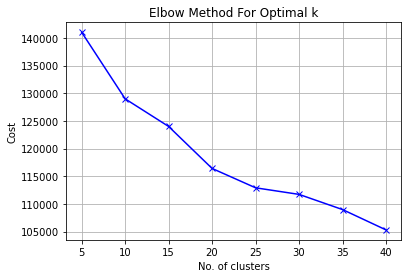

In [156]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

## Definindo o Número de Clusters como 28

In [157]:
kmode = KModes(n_clusters=28, init = "random", n_init = 5, verbose=1)
kmode.fit_predict(df_categorico)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11292, cost: 113423.0
Run 1, iteration: 2/100, moves: 1745, cost: 113423.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11036, cost: 114011.0
Run 2, iteration: 2/100, moves: 1460, cost: 114011.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5042, cost: 114374.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8324, cost: 116730.0
Run 4, iteration: 2/100, moves: 465, cost: 116730.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 15466, cost: 112806.0
Run 5, iteration: 2/100, moves: 2611, cost: 112656.0
Run 5, iteration: 3/100, moves: 63, cost: 112656.0
Best run was number 5


array([ 1, 15,  3, ..., 25, 12, 15], dtype=uint16)

In [158]:
# Cluster centorid
kmode.cluster_centroids_

array([['M', 'Trabalhadores da construção civil e obras públicas',
        'Lesões, envenenamentos e algumas outras conseqüências de causas externas\t',
        'Construcao de Edific', 'Escoriacao, Abrasao',
        'Partes Multiplas - A', 'Masculino', 'Trajeto'],
       ['M',
        'Trabalhadores de montagem de tubulações, estruturas metálicas e de compósitos',
        'Lesões, envenenamentos e algumas outras conseqüências de causas externas\t',
        'Instalacoes Eletrica', 'Contusao, Esmagament', 'Dedo',
        'Masculino', 'Típico'],
       ['M', 'Trabalhadores da construção civil e obras públicas',
        'Lesões, envenenamentos e algumas outras conseqüências de causas externas\t',
        'Construcao de Rodovi', 'Contusao, Esmagament', 'Cabeca, Nic',
        'Masculino', 'Típico'],
       ['M', 'Trabalhadores da construção civil e obras públicas',
        'Lesões, envenenamentos e algumas outras conseqüências de causas externas\t',
        'Servicos Especializa', 'Corte, La

In [159]:
data_df = pd.DataFrame(kmode.cluster_centroids_)
data_df.columns = list(df_categorico.columns)

In [160]:
data_df.head()

,Agente Causador Acidente,CBO,CID-10,CNAE2.0 Empregador.1,Natureza da Lesão,Parte Corpo Atingida,Sexo,Tipo do Acidente
0,M,Trabalhadores da construção civil e obras públ...,"Lesões, envenenamentos e algumas outras conseq...",Construcao de Edific,"Escoriacao, Abrasao",Partes Multiplas - A,Masculino,Trajeto
1,M,"Trabalhadores de montagem de tubulações, estru...","Lesões, envenenamentos e algumas outras conseq...",Instalacoes Eletrica,"Contusao, Esmagament",Dedo,Masculino,Típico
2,M,Trabalhadores da construção civil e obras públ...,"Lesões, envenenamentos e algumas outras conseq...",Construcao de Rodovi,"Contusao, Esmagament","Cabeca, Nic",Masculino,Típico
3,M,Trabalhadores da construção civil e obras públ...,"Lesões, envenenamentos e algumas outras conseq...",Servicos Especializa,"Corte, Laceracao, Fe",Dedo,Masculino,Típico
4,B,Trabalhadores da construção civil e obras públ...,Causas externas de morbidade e de mortalidade\t,Construcao de Edific,"Corte, Laceracao, Fe",Joelho,Masculino,Típico


In [162]:
import datetime
hoje = datetime.date.today()
nome = 'kmodes\\centroides' + str(hoje) + '.csv'
data_df.to_csv(nome)

In [165]:
# Checando o custo do Cluster criado
kmode.cost_

112656.0